In [1]:
import zipfile

with zipfile.ZipFile('/content/drive/MyDrive/datasets.zip') as f:
  f.extractall()

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [14]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt

In [15]:
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf

In [16]:
data = tf.keras.utils.image_dataset_from_directory('/content/datasets/train')

Found 1553 files belonging to 2 classes.


In [17]:
# import shutil

# directory_path = '/content/datasets/test/normal'

# # Delete all files and subdirectories in the specified directory
# shutil.rmtree(directory_path)


In [18]:
data_iterator = data.as_numpy_iterator()

In [19]:
batch = data_iterator.next()


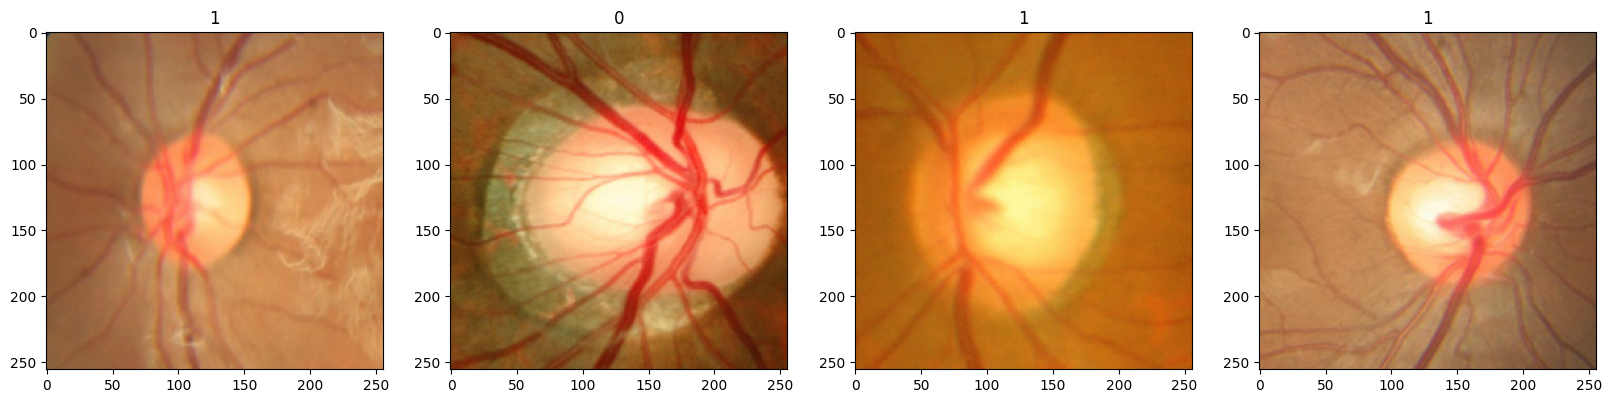

In [20]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [21]:
data = data.map(lambda x,y: (x/255, y))

In [22]:
data.as_numpy_iterator().next()

(array([[[[7.5294119e-01, 3.6862746e-01, 2.3137255e-01],
          [7.4583334e-01, 3.6151960e-01, 2.2426471e-01],
          [7.5171566e-01, 3.6740196e-01, 2.3014706e-01],
          ...,
          [1.2254902e-03, 9.9264709e-03, 6.1274512e-04],
          [9.3137259e-03, 0.0000000e+00, 6.1274511e-03],
          [2.3529412e-02, 0.0000000e+00, 2.7450981e-02]],
 
         [[7.4938726e-01, 3.6862746e-01, 2.3137255e-01],
          [7.4227941e-01, 3.6151960e-01, 2.2426471e-01],
          [7.4516314e-01, 3.6440334e-01, 2.2714844e-01],
          ...,
          [6.7018997e-04, 6.9278493e-03, 5.7444853e-05],
          [5.4266239e-03, 0.0000000e+00, 2.2403493e-03],
          [1.6421570e-02, 0.0000000e+00, 2.0343138e-02]],
 
         [[7.4571079e-01, 3.7524509e-01, 2.3468137e-01],
          [7.3860294e-01, 3.6813724e-01, 2.2757353e-01],
          [7.4396831e-01, 3.6512715e-01, 2.2735524e-01],
          ...,
          [1.1297488e-03, 3.8258273e-03, 5.1700370e-04],
          [8.0231307e-03, 0.0000000e+

In [23]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [24]:
train_size

34

In [25]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

6. Build Deep Learning Model

In [26]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [28]:
model = Sequential()


In [29]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [30]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])


In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [32]:
logdir = 'logs'

In [33]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [34]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

hist = model.fit(train, epochs=30, validation_data=val, callbacks=[tensorboard_callback, early_stopping])


Epoch 1/30
34/34 [==============================] - 12s 181ms/step - loss: 0.5275 - accuracy: 0.7399 - val_loss: 0.4354 - val_accuracy: 0.8021
Epoch 2/30
34/34 [==============================] - 9s 241ms/step - loss: 0.3630 - accuracy: 0.8493 - val_loss: 0.4803 - val_accuracy: 0.7882
Epoch 3/30
34/34 [==============================] - 8s 220ms/step - loss: 0.3838 - accuracy: 0.8438 - val_loss: 0.4065 - val_accuracy: 0.8125
Epoch 4/30
34/34 [==============================] - 8s 213ms/step - loss: 0.3781 - accuracy: 0.8410 - val_loss: 0.4195 - val_accuracy: 0.7951
Epoch 5/30
34/34 [==============================] - 7s 203ms/step - loss: 0.3463 - accuracy: 0.8502 - val_loss: 0.3869 - val_accuracy: 0.8056
Epoch 6/30
34/34 [==============================] - 7s 190ms/step - loss: 0.3244 - accuracy: 0.8631 - val_loss: 0.3483 - val_accuracy: 0.8333
Epoch 7/30
34/34 [==============================] - 8s 234ms/step - loss: 0.3130 - accuracy: 0.8686 - val_loss: 0.3626 - val_accuracy: 0.8194
Epoch

# 8. Plot Performance


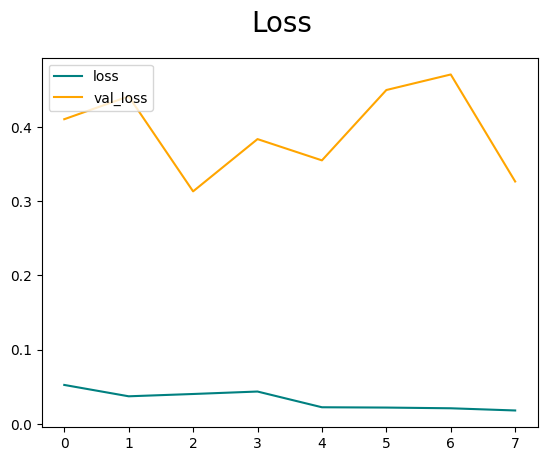

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

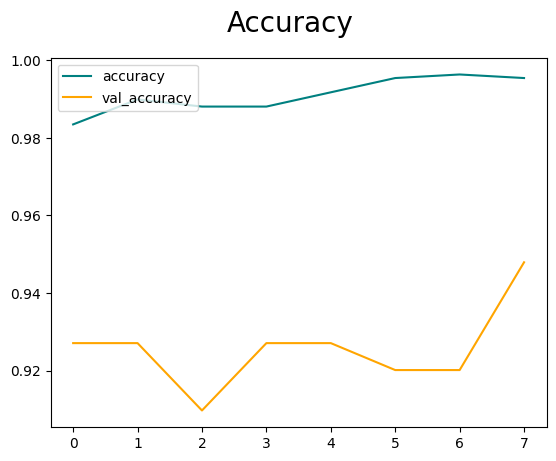

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy


In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)


1/1 [==============================] - 0s 29ms/step


In [ ]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.942029, shape=(), dtype=float32) tf.Tensor(0.89041096, shape=(), dtype=float32) tf.Tensor(0.90625, shape=(), dtype=float32)


# 10. Test

In [ ]:
import cv2

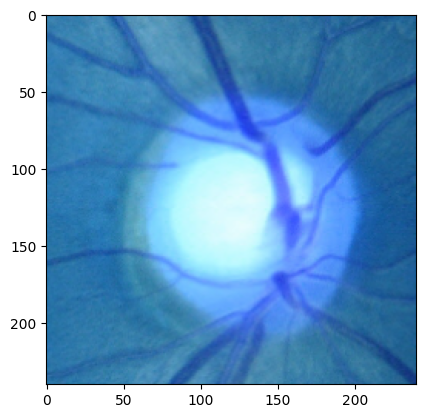

In [ ]:
img = cv2.imread('/content/datasets/train/normal/1 (1).png')
plt.imshow(img)
plt.show()

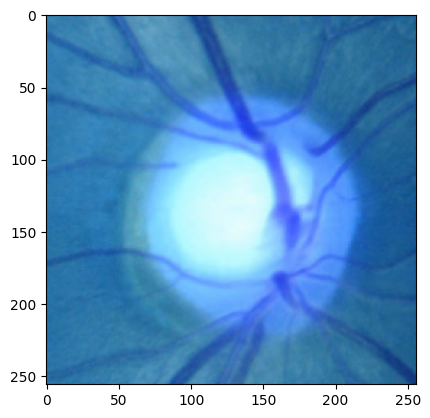

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 19ms/step


In [ ]:
yhat

array([[1.]], dtype=float32)

In [ ]:
if yhat > 0.5:
    print(f'Predicted class is Glaucoma')
else:
    print(f'Predicted class is Normal')

Predicted class is Glaucoma


In [11]:
import cv2
import numpy as np
from keras.models import load_model
import tensorflow as tf
from tensorflow.keras.preprocessing import image

# Load the model
model = load_model('/content/drive/MyDrive/glaucoma.h5')
print("Model loaded")

# Print out the names of the layers
for layer in model.layers:
    print(layer.name)

# Access the correct layer weights
conv_weights = model.get_layer('conv2d_3').get_weights()

# Get the shape of the kernel
kernel_shape = conv_weights[0].shape
print("Kernel shape:", kernel_shape)

# Load and preprocess the test image
test_image = tf.keras.utils.load_img('/content/datasets/train/glau/1 (1).png', target_size=(240, 240))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

# Perform prediction
result = model.predict(test_image)
prediction = result[0][0]

# Print the prediction in a more readable format
print("Prediction:", '{:.10f}'.format(prediction))

#ignore this
if result[0][0] < 1:
  print("Glaucoma")
else:
  print("Normal")

Model loaded
conv2d_3
max_pooling2d_3
conv2d_4
max_pooling2d_4
flatten_2
dense_3
dense_4
Kernel shape: (5, 5, 3, 32)
1/1 [==============================] - 0s 97ms/step
Prediction: 0.0000000000
Glaucoma


In [ ]:
def ip():
    global panelC,Ip
    image = prashu.copy()
    image = cv2.resize(image, (256, 256), interpolation=cv2.INTER_AREA)
    orig=image.copy()                                                   #copy of the image
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)                        #Gray conversion
    gray = cv2.GaussianBlur(gray, (3, 3), 0)                              #applying gaussian blur
    (minVal, maxVal, minLoc, maxLoc) = cv2.minMaxLoc(gray)

    cv2.circle(image, maxLoc, 80, (0, 0, 0), 2)
    disc = 3.14 * 80 * 80
    print('Area of Disc:'+str(disc))

    r,g,b = cv2.split(orig)

    kernel = np.ones((5,5), np.uint8)
    img_dilation = cv2.dilate(g, kernel, iterations=1)

#stretching
    minmax_img = np.zeros((img_dilation.shape[0],img_dilation.shape[1]),dtype = 'uint8')

# Loop over the image and apply Min-Max formulae
    for i in range(img_dilation.shape[0]):
        for j in range(img_dilation.shape[1]):
            minmax_img[i,j] = 255*(img_dilation[i,j]-np.min(img_dilation))/(np.max(img_dilation)-np.min(img_dilation))

    merge = cv2.merge((r,minmax_img,b))

    HSV_img = cv2.cvtColor(merge,cv2.COLOR_RGB2HSV)
    h,s,v = cv2.split(HSV_img)

    median = cv2.medianBlur(s,5)
    merge1 = cv2.merge((h,s,median))

    cv2.imwrite('D:\\Coding\\VsCode\\Glucomma Detection\\working1\\merge_oc.jpg',merge1)
    image_merge = Image.open('D:\\Coding\\VsCode\\Glucomma Detection\\working1\\merge_oc.jpg')

    enh_col = ImageEnhance.Color(image_merge)
    image_colored_oc = enh_col.enhance(7)

    cv2.imwrite('D:\\Coding\\VsCode\\Glucomma Detection\\working1\\image_colored_oc.jpg', np.float32(image_colored_oc))
    image_c_oc = cv2.imread('D:\\Coding\\VsCode\\Glucomma Detection\\working1\\image_colored_oc.jpg')


    lab = cv2.cvtColor(image_c_oc, cv2.COLOR_BGR2LAB)

    Z = lab.reshape((-1,3))
    Z = np.float32(Z)

    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

    K=2
    ret, label1, center1 = cv2.kmeans(Z, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    center1 = np.uint8(center1)
    res1 = center1[label1.flatten()]
    output1 = res1.reshape((lab.shape))

    bilateral_filtered_image = cv2.bilateralFilter(output1, 5, 175, 175)
    edge_detected_image = cv2.Canny(bilateral_filtered_image, 75, 200)

    contours, _= cv2.findContours(edge_detected_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    contour_list = []
    for contour in contours:
        approx = cv2.approxPolyDP(contour,0.01*cv2.arcLength(contour,True),True)
        area = cv2.contourArea(contour)
        if ((len(approx) > 8) & (area > 30) ):
            contour_list.append(contour)
    cv2.drawContours(image, contour_list,  -1, (255,0,0), 1)

    ellipse = cv2.fitEllipse(contour)
    cv2.ellipse(image,ellipse,(0,0,0),1,cv2.LINE_AA)
    image =cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    display(image,panelC)
    (x, y), (MA, ma), angle = cv2.fitEllipse(contour)
#print(MA)
#print(ma)
    cuparea = (3.14/3) * MA * ma
    print('Area of cup:'+str(cuparea))
    cdr = cuparea / disc
    print('Cup to Disc Ratio:'+str(cdr))

##cv2.imwrite('E:\\working1\\cup\\2.jpg',img_new)
#
    if cdr>0.5:
        Ip=1
        print('glaucoma')#glaucoma
        text=Text(root,height=6,font=('calibri',13),foreground='black')
        text.insert(INSERT,"IMAGE PROCESSING RESULTS\n")
        text.insert(INSERT,"Area of Disc : " + str(disc) + "\n")
        text.insert(INSERT,"Area of Cup : " + str(cuparea) + "\n")
        text.insert(INSERT,"Cup to Disc Ratio : " + str(cdr) + "\n")
        text.insert(INSERT,"GLAUCOMA")
        text.pack()
    else:
        Ip=0
        print('Normal')#normal
        text=Text(root,height=6,font=('calibri',13),foreground='black')
        text.insert(INSERT,"IMAGE PROCESSING RESULTS\n")
        text.insert(INSERT,"Area of Disc : " + str(disc) + "\n")
        text.insert(INSERT,"Area of Cup : " + str(cuparea) + "\n")
        text.insert(INSERT,"Cup to Disc Ratio : " + str(cdr) + "\n")
        text.insert(INSERT,"NORMAL")
        text.pack()